# Market Basket Analysis for Retailers

In this task, you will implement a Market Basket Analysis using association rule mining, specifically using the Apriori algorithm. The goal is to extract meaningful patterns from retail transaction data and use these insights to make actionable business decisions. You will work with a dataset of retail transactions and apply MBA to identify products frequently bought together.

In [ ]:
# Install
!pip install matplotlib
!pip install seaborn
!pip install pandas matplotlib seaborn mlxtend

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
  Using cached mlxtend-0.23.3-py3-none-any.whl.metadata (7.3 kB)
Using cached mlxtend-0.23.3-py3-none-any.whl (1.4 MB)


In [ ]:
# Import libraries
import pandas as pd

#for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#For Apriori
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# 1.1 Data Preprocessing
- Clean the dataset by removing unnecessary columns, handling missing values, and formatting it for analysis.

In [30]:
#Import the data
data = pd.read_csv('./dataset_grocery.csv')
data

,Item(s),Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9,...,Item 23,Item 24,Item 25,Item 26,Item 27,Item 28,Item 29,Item 30,Item 31,Item 32
0,4,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,17,sausage,chicken,beef,hamburger meat,citrus fruit,grapes,root vegetables,whole milk,butter,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9831,1,cooking chocolate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9832,10,chicken,citrus fruit,other vegetables,butter,yogurt,frozen dessert,domestic eggs,rolls/buns,rum,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9833,4,semi-finished bread,bottled water,soda,bottled beer,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
data.head(10)

,Item(s),Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9,...,Item 23,Item 24,Item 25,Item 26,Item 27,Item 28,Item 29,Item 30,Item 31,Item 32
0,4,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,whole milk,butter,yogurt,rice,abrasive cleaner,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1,rolls/buns,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,5,other vegetables,UHT-milk,rolls/buns,bottled beer,liquor (appetizer),NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1,potted plants,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2,whole milk,cereals,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
data.describe()

,Item(s)
count,9835.000000
mean,4.409456
std,3.589385
min,1.000000
25%,2.000000
50%,3.000000
75%,6.000000
max,32.000000


# 1.2 Data Visualization 

- Top 25 frequently buying items by customers

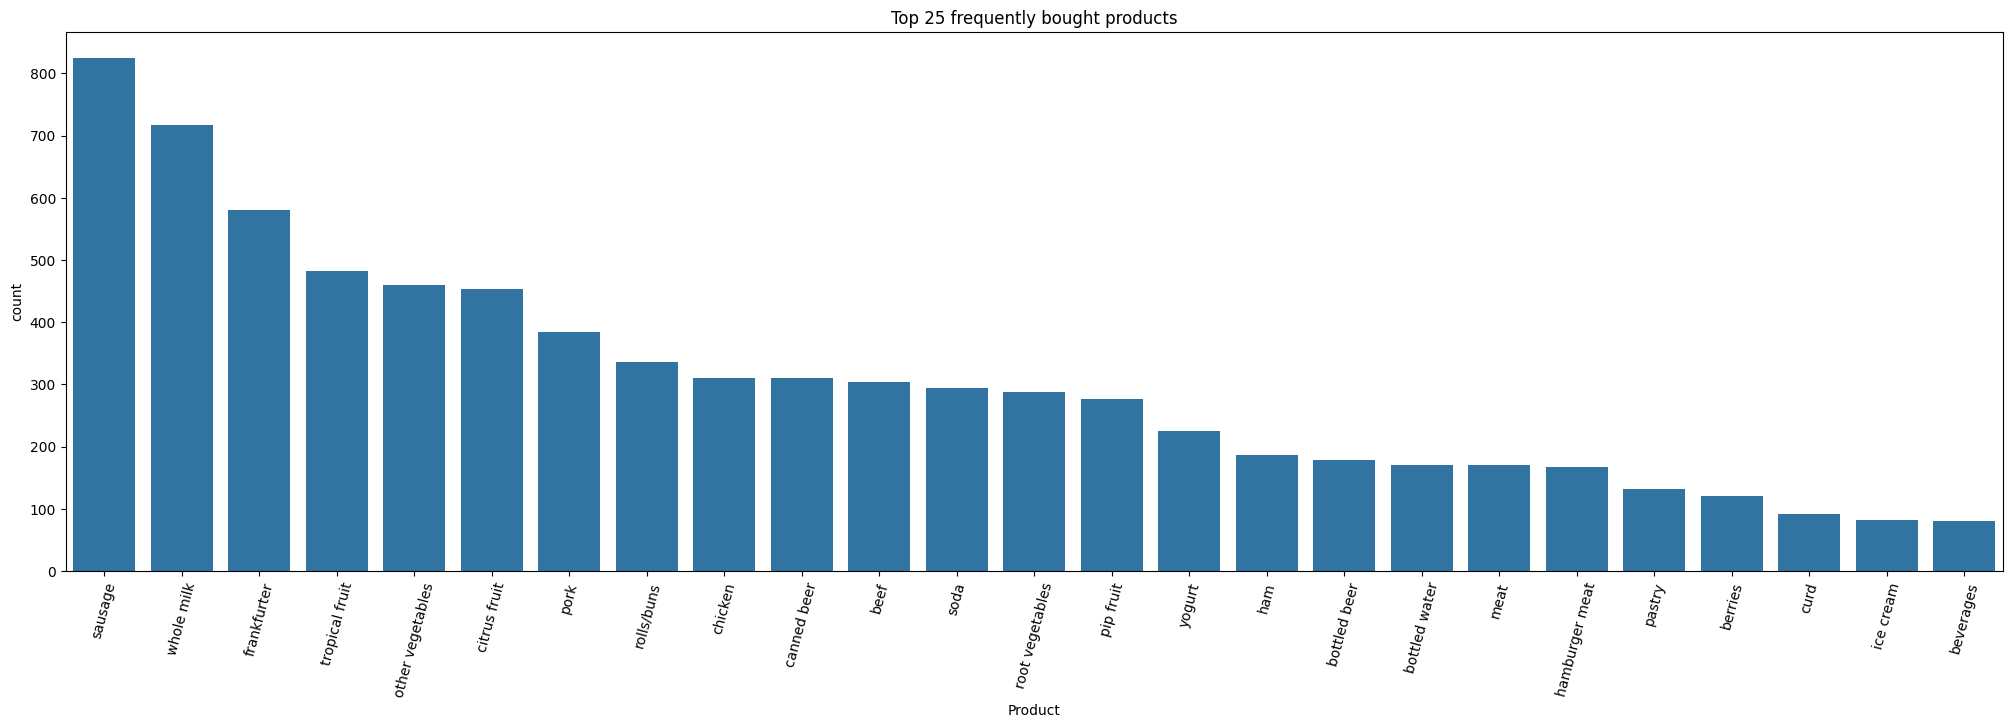

In [18]:
#Top 25 frequently buying items by customer
plt.rcParams['figure.figsize']=25,7
sns.countplot(data=data, x=data['Item 1'], order = data['Item 1'].value_counts().head(25).index)
plt.xticks(rotation=75)
plt.xlabel('Product')
plt.title('Top 25 frequently bought products')
plt.show()

# 1.3 Implement Apriori Algorithm

- Apply the Apriori algorithm to extract frequent itemsets from the transaction data.
- Steps:
    1. Hot Encoding
    2. Apply Apriori Algorithm

In [19]:
# Preparing data using one-hot-encoding
hot_encoding_data = pd.get_dummies(data.drop(columns=['Item(s)'], axis=1), prefix="i")

hot_encoding_data

,i_Instant food products,i_UHT-milk,i_abrasive cleaner,i_artif. sweetener,i_baby cosmetics,i_bags,i_baking powder,i_bathroom cleaner,i_beef,i_berries,...,i_chocolate,i_hygiene articles,i_napkins,i_sugar,i_cooking chocolate,i_house keeping products,i_soups,i_skin care,i_hygiene articles,i_candles
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9831,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9832,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9833,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [20]:
hot_encoding_data = hot_encoding_data.groupby(level=0).sum()
hot_encoding_data

,i_Instant food products,i_UHT-milk,i_abrasive cleaner,i_artif. sweetener,i_baby cosmetics,i_bags,i_baking powder,i_bathroom cleaner,i_beef,i_berries,...,i_chocolate,i_hygiene articles,i_napkins,i_sugar,i_cooking chocolate,i_house keeping products,i_soups,i_skin care,i_hygiene articles,i_candles
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9831,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9832,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9833,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
freq_itemsets = apriori(hot_encoding_data, min_support=0.015, use_colnames=True)
freq_itemsets

C:\Users\LENOVO\AppData\Roaming\Python\Python313\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.030910,(i_beef)
1,0.018099,(i_bottled beer)
2,0.017285,(i_bottled water)
3,0.031520,(i_canned beer)
4,0.031622,(i_chicken)
5,0.046060,(i_citrus fruit)
6,0.058973,(i_frankfurter)
7,0.018912,(i_ham)
8,0.016980,(i_hamburger meat)
9,0.017285,(i_meat)


In [22]:
freq_itemsets[(freq_itemsets['support']>0.05)]

,support,itemsets
6,0.058973,(i_frankfurter)
15,0.083884,(i_sausage)
18,0.072903,(i_whole milk)
23,0.055923,(i_other vegetables)
29,0.066497,(i_whole milk)
35,0.051449,(i_whole milk)


In [34]:
rules = association_rules(freq_itemsets,metric='lift', min_threshold=1, num_itemsets=len(freq_itemsets))
rules.sort_values(by='confidence',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
1,(i_whole milk),(i_other vegetables),0.015150,0.025826,0.017285,1.140940,44.17772,1.0,0.016894,inf,0.992399,0.729614,1.144676,0.905115
0,(i_other vegetables),(i_whole milk),0.025826,0.015150,0.017285,0.669291,44.17772,1.0,0.016894,2.977999,1.003275,0.729614,0.664204,0.905115


Confidence: Measures how reliable a rule is. Higher confidence means the consequent is likely to be purchased if the antecedent is purchased.

Lift: Indicates the strength of the association. A lift greater than 1 suggests that the items are positively associated.

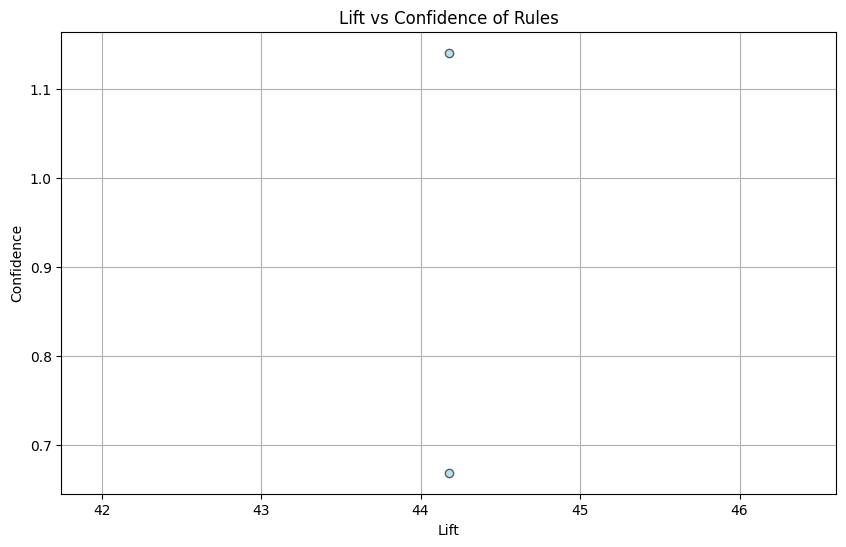

In [ ]:
#Scatter Plot of Lift vs Confidence => To visualize the relationship between the lift and confidence metrics for the association rules.

plt.figure(figsize=(10, 6))
plt.scatter(rules['lift'], rules['confidence'], alpha=0.6, edgecolor='k', color='skyblue')
plt.title('Lift vs Confidence of Rules')
plt.xlabel('Lift')
plt.ylabel('Confidence')
plt.grid(True)
plt.show()


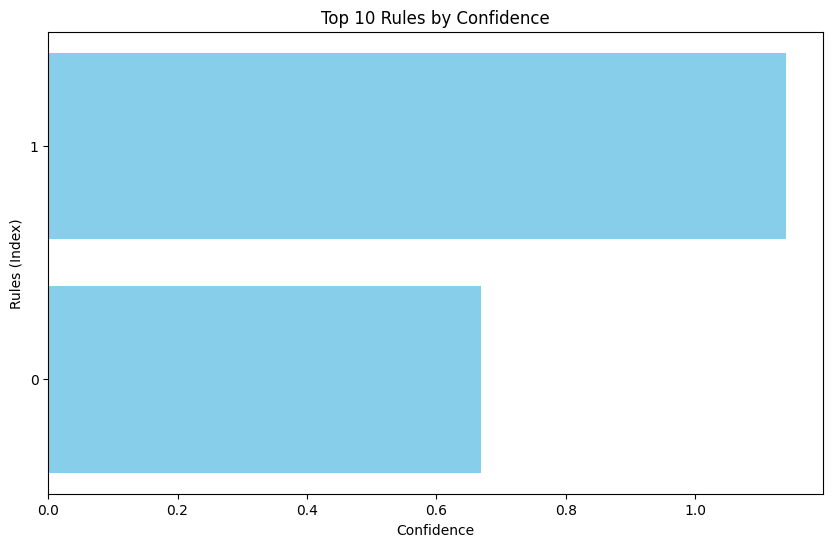

In [25]:
#Bar Plot of Top 10 Rules by Confidence
top_rules = rules.nlargest(10, 'confidence')
plt.figure(figsize=(10, 6))
plt.barh(top_rules.index.astype(str), top_rules['confidence'], color='skyblue')
plt.xlabel('Confidence')
plt.ylabel('Rules (Index)')
plt.title('Top 10 Rules by Confidence')
plt.gca().invert_yaxis()  # Reverse the order for better readability
plt.show()

Each bar represents a rule, with its length indicating the confidence level.

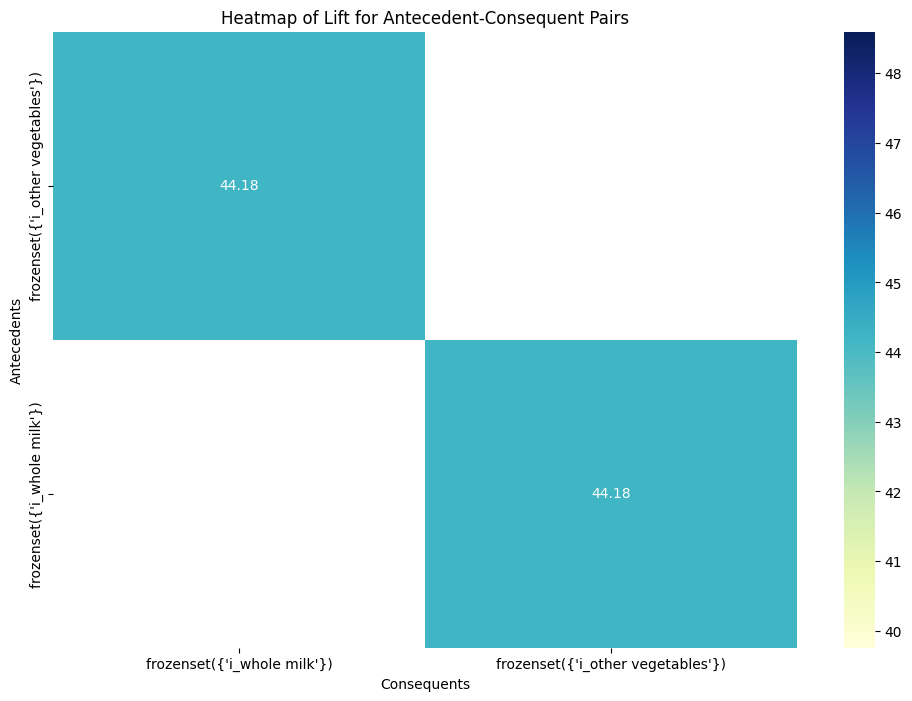

In [26]:
#Heatmap of Lift Values
heatmap_data = rules.pivot(index='antecedents', columns='consequents', values='lift')
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title('Heatmap of Lift for Antecedent-Consequent Pairs')
plt.xlabel('Consequents')
plt.ylabel('Antecedents')
plt.show()